./configs/gen_damped_config.json
./configs/gen_damped_config.json
./configs/gen_damped_config.json


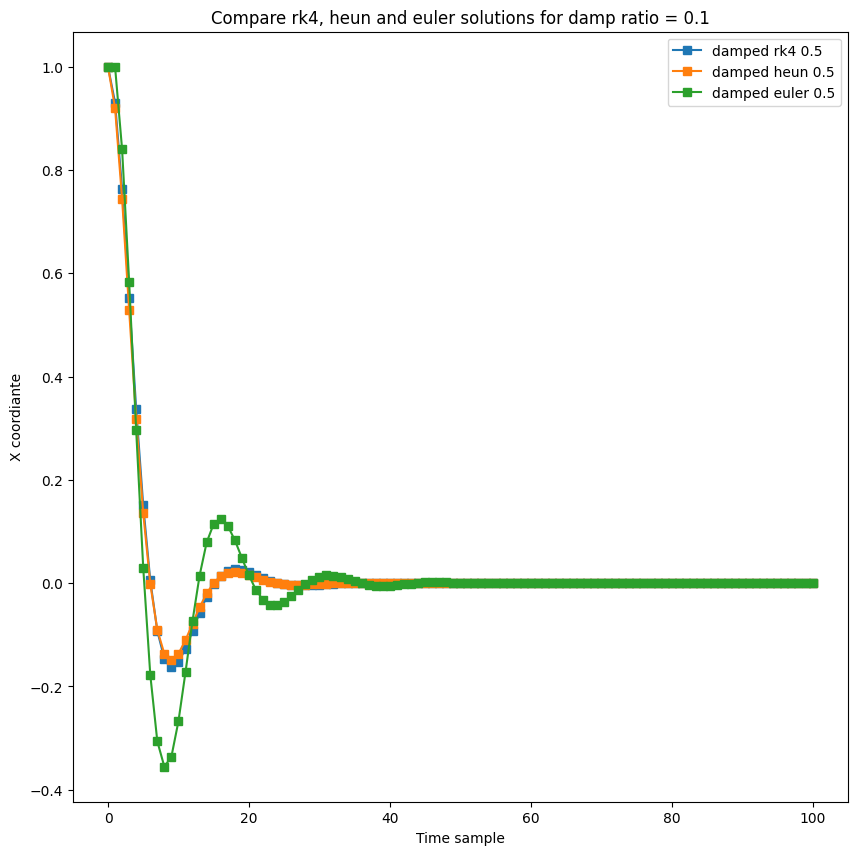

In [3]:
from plot_context import *
from config_helper import *
from plotter import *

import matplotlib.pyplot as plt

def prepare_harmonic_and_physic():

    fig = plt.figure(figsize = (10, 10))
    ax = plt.gca()
    ax.set_title('Compare rk4, heun and euler solutions for damp ratio = 0.1')
    ax.set_xlabel('Time sample')
    ax.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('gen_damped_config', {
                                        	"model" : "Damped",
                                        	"solver" : "rk4",
                                        	"output" : "damped.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0,
                                        
                                        	"x0" : 1, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 40,
                                        	"sampleNum" : 100
                                            })

with PlotContextManager(prepare_harmonic_and_physic, "harmonic vs physic") as ax:

        solver_program_path = './solver.exe'
    
        solver_names = ['rk4', 'heun', 'euler']
    
        for solver_name in solver_names:

            damp_ratios = [0.5]

            for damp_ratio in damp_ratios:

                damped_config['damp_ratio'] = damp_ratio
                damped_config['solver'] = solver_name
                damped_config.write()
                
                run_config(solver_program_path, damped_config.name)

                ses_name = 'damped ' + solver_name + ' ' + str(damp_ratio)
                ses_info = SesInfo(ses_name, damped_config, Style('s'))
        
                SesPlotter.plot_x(ses_info, ax)
     